In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Description of Data


In [2]:
filename = "/Users/sameerladha/Documents/School/Masters of Science - Data Science and Analytics/MRP/Datasets/csv/clfinal_.csv"
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3014 non-null   object 
 1   date                      3014 non-null   object 
 2   author                    2698 non-null   object 
 3   title                     200 non-null    object 
 4   text                      2879 non-null   object 
 5   comment_on                2814 non-null   object 
 6   type                      3014 non-null   object 
 7   score                     3014 non-null   int64  
 8   upvote_ratio              200 non-null    float64
 9   url                       199 non-null    object 
 10  permalink                 3014 non-null   object 
 11  user_flair                3014 non-null   object 
 12  submission_flair          200 non-null    object 
 13  Toxicity                  2881 non-null   float64
 14  Severe T

In [3]:
def generate_generic_username(index):
    return f"User{index+1}"

unique_authors = df['author'].unique()
author_mapping = {author: f"User{i+1}" for i, author in enumerate(unique_authors)}
df['author'] = df['author'].map(author_mapping)

### VADER Sentiment Score Descriptive Statistics

In [4]:
print("VADER Sentiment Compound Statistics")
print("-" * 25)
df["vader_sentiment_compound"].describe()

VADER Sentiment Compound Statistics
-------------------------


count    2844.000000
mean       -0.005879
std         0.586509
min        -0.999300
25%        -0.513725
50%         0.000000
75%         0.478125
max         0.999000
Name: vader_sentiment_compound, dtype: float64

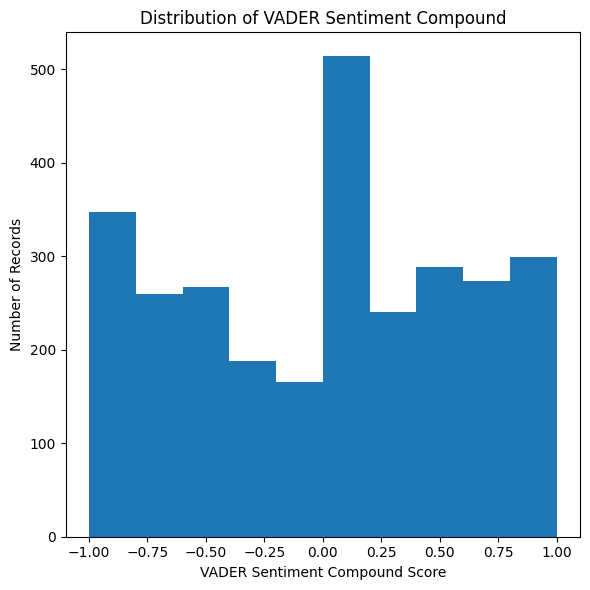

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

# Plot the histogram
ax1.hist(df["vader_sentiment_compound"].dropna())
ax1.set_ylabel("Number of Records")
ax1.set_xlabel("VADER Sentiment Compound Score")
ax1.set_title("Distribution of VADER Sentiment Compound")

plt.tight_layout()
plt.show()

### Toxicity Score Descriptive Statistics


In [6]:
print("Toxicity Statistics")
print("-" * 25)
df["Toxicity"].describe()

Toxicity Statistics
-------------------------


count    2881.000000
mean        0.200773
std         0.207951
min         0.004712
25%         0.039463
50%         0.113987
75%         0.297711
max         0.956375
Name: Toxicity, dtype: float64

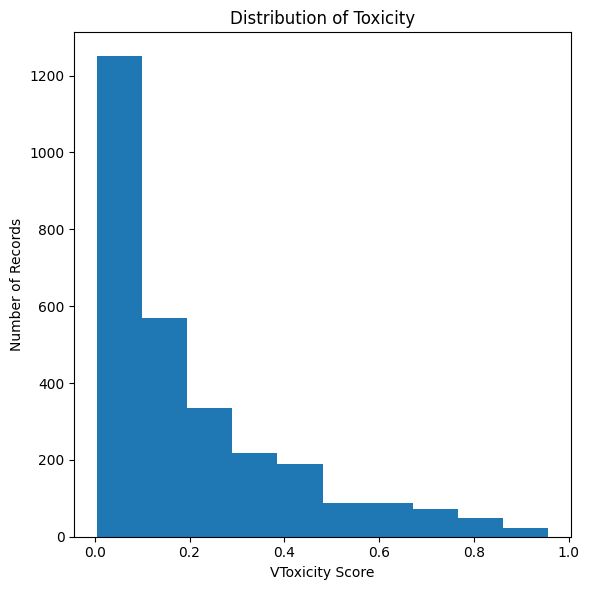

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

# Plot the histogram
ax1.hist(df["Toxicity"].dropna())
ax1.set_ylabel("Number of Records")
ax1.set_xlabel("VToxicity Score")
ax1.set_title("Distribution of Toxicity")


plt.tight_layout()
plt.show()

## User Statistics


In [8]:
# Find the number of unique users in the 'author' column
unique_users = df["author"].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique users: 765


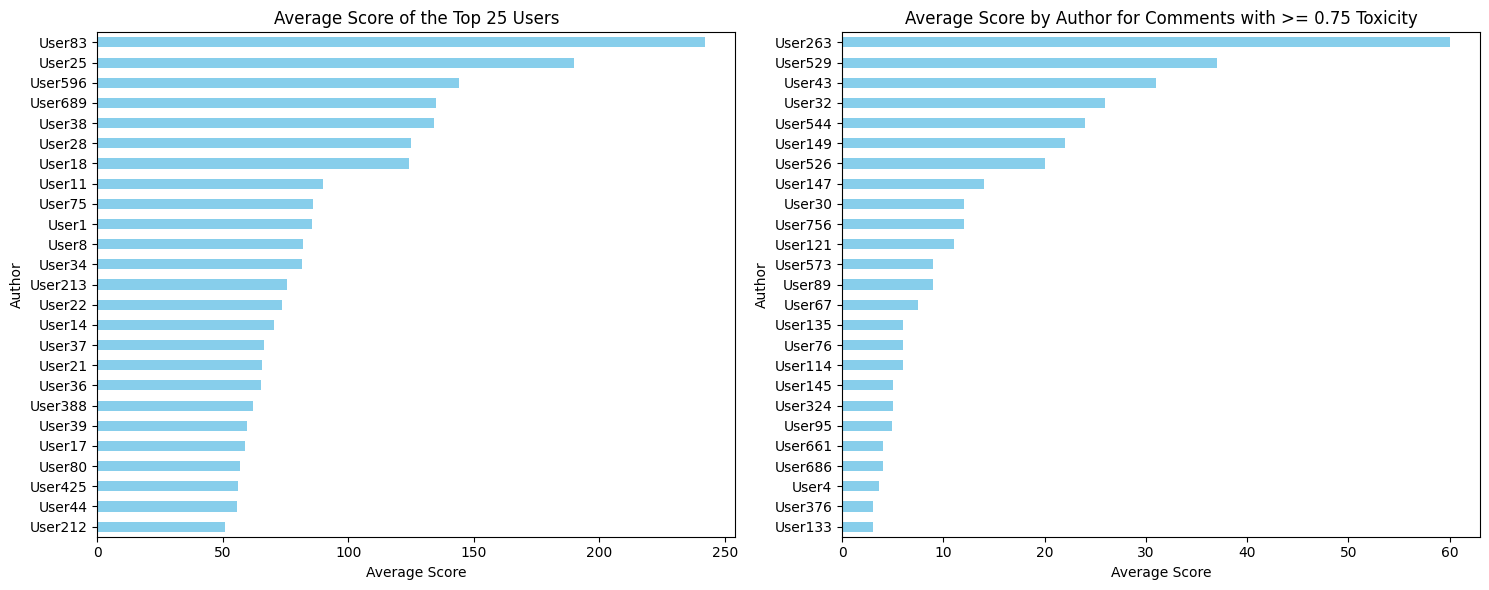

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Get the top 25 users by average score
average_scores_by_user = df.groupby("author")["score"].mean()
top_25_users_by_average_score = average_scores_by_user.sort_values(
    ascending=False
).head(25)
top_25_users_by_average_score.sort_values().plot(
    kind="barh", color="skyblue", ax=axes[0]
)
axes[0].set_title("Average Score of the Top 25 Users")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("Author")

# Average Score by Author Based on High Toxicity Level
toxic_df = df[df["Toxicity"] >= 0.75]
average_toxic_score_by_author = toxic_df.groupby("author")["score"].mean()
top_toxic_authors = average_toxic_score_by_author.sort_values(ascending=False).head(25)
top_toxic_authors.sort_values().plot(kind="barh", color="skyblue", ax=axes[1])
axes[1].set_title("Average Score by Author for Comments with >= 0.75 Toxicity")
axes[1].set_xlabel("Average Score")
axes[1].set_ylabel("Author")

plt.tight_layout()
plt.show()

## User Flair Data


In [10]:
df = pd.read_csv(filename)

# Standardize filtering by converting 'user_flair' to lowercase and stripping spaces and quotes
df['user_flair'] = df['user_flair'].str.lower().str.strip("'\"")
df_filtered = df[(df["user_flair"] != "none") & (df["user_flair"] != "")]

unique_flairs = df_filtered["user_flair"].unique()
print (len(unique_flairs))
if len(unique_flairs) > 0:
    print("The unique User_Flair types are:")
    print("-" * 37)
    for flair in unique_flairs:
        print(f"- {flair}")
else:
    print("There are no User Flairs in this dataset")
    
# Calculate the count of posts for each user flair to find the most active flairs
flair_activity = df_filtered['user_flair'].value_counts().head(20)

27
The unique User_Flair types are:
-------------------------------------
- turtle island > canada
- marxist-leninist
- temporarily embarassed billionaire
- let's get unionized
- click this for custom flair
- acab
- fellow traveler
- skirt and sock socialism
- first electoral reform, then communism
- electric trains n o w
- ml bethunist
- canadian.leftist.meme.stash
- 3 corporations in a trenchcoat
- blood orange
- star trek socialist
- no gods, no masters, nofrills
- please i just want healthcare
- marxism-leninism
- better red than being a working slave
- nationalize that ass
- anarchist
- human capital stock thx-1139
- \ud83d\ude84\ud83d\ude86\ud83d\ude85\ud83d\ude82\ud83d\ude83 train gang \ud83d\ude84\ud83d\ude86\ud83d\ude85\ud83d\ude82\ud83d\ude83
- vive le qu\u00e9bec ivre!
- abolish canada
- tired voice of reason
- chinese bot


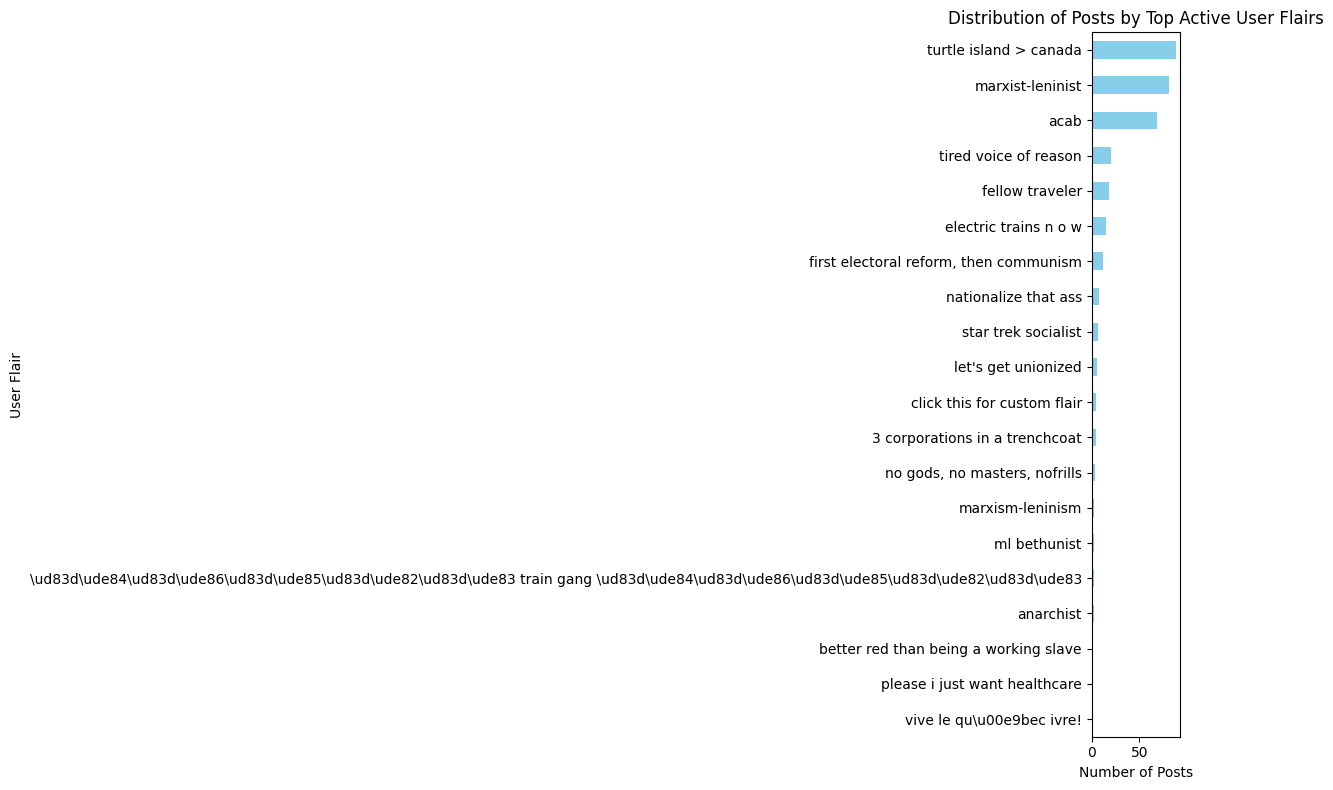

In [11]:
# Horizontal Bar Chart for Distribution of Posts by Top Active User Flairs
plt.figure(figsize=(12, 8))
flair_activity.sort_values().plot(kind='barh', color='skyblue')
plt.title("Distribution of Posts by Top Active User Flairs")
plt.xlabel("Number of Posts")
plt.ylabel("User Flair")
plt.tight_layout()
plt.show()

### Toxicity and User Flairs


/var/folders/ww/nf29rwys3wn_rwns0p_vcq7m0000gn/T/ipykernel_88629/1183737454.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


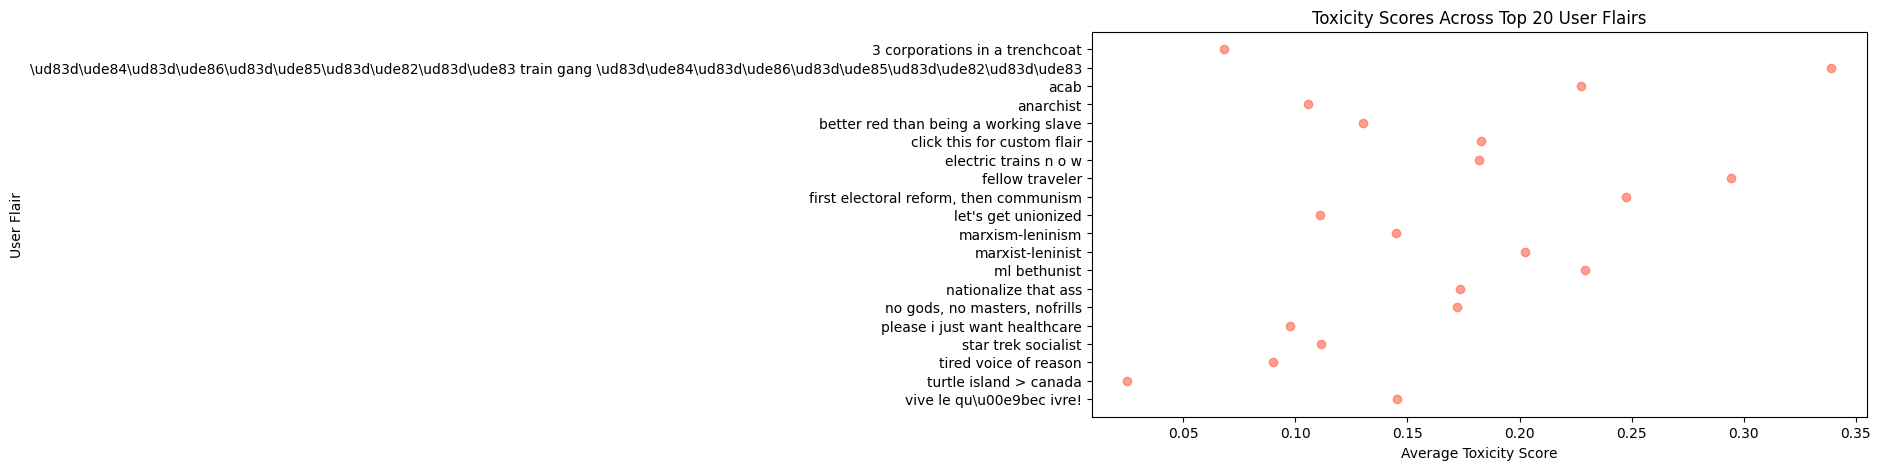

In [12]:
top_20_flairs = df_filtered['user_flair'].value_counts().head(20).index

#Filter the DataFrame to include only the top 20 flairs
df_top_20_flairs = df_filtered[df_filtered['user_flair'].isin(top_20_flairs)]

#Calculate the mean toxicity score for these flairs
flair_toxicity = df_top_20_flairs.groupby("user_flair")["Toxicity"].mean()

#Sort and prepare the data for plotting
flair_toxicity_sorted = flair_toxicity.sort_index(ascending=False)
flair_toxicity_sorted.index = pd.CategoricalIndex(flair_toxicity_sorted.index, ordered=True, categories=sorted(flair_toxicity_sorted.index))
flair_codes = flair_toxicity_sorted.index.codes

plt.figure(figsize=(10, 5))
plt.scatter(flair_toxicity_sorted.values, flair_codes, alpha=0.6, color='tomato')
plt.yticks(flair_codes, flair_toxicity_sorted.index.categories)
plt.title("Toxicity Scores Across Top 20 User Flairs")
plt.ylabel("User Flair")
plt.xlabel("Average Toxicity Score")
plt.tight_layout()
plt.show()

### Vader Sentiment Compound and User Flairs


/var/folders/ww/nf29rwys3wn_rwns0p_vcq7m0000gn/T/ipykernel_88629/72844708.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


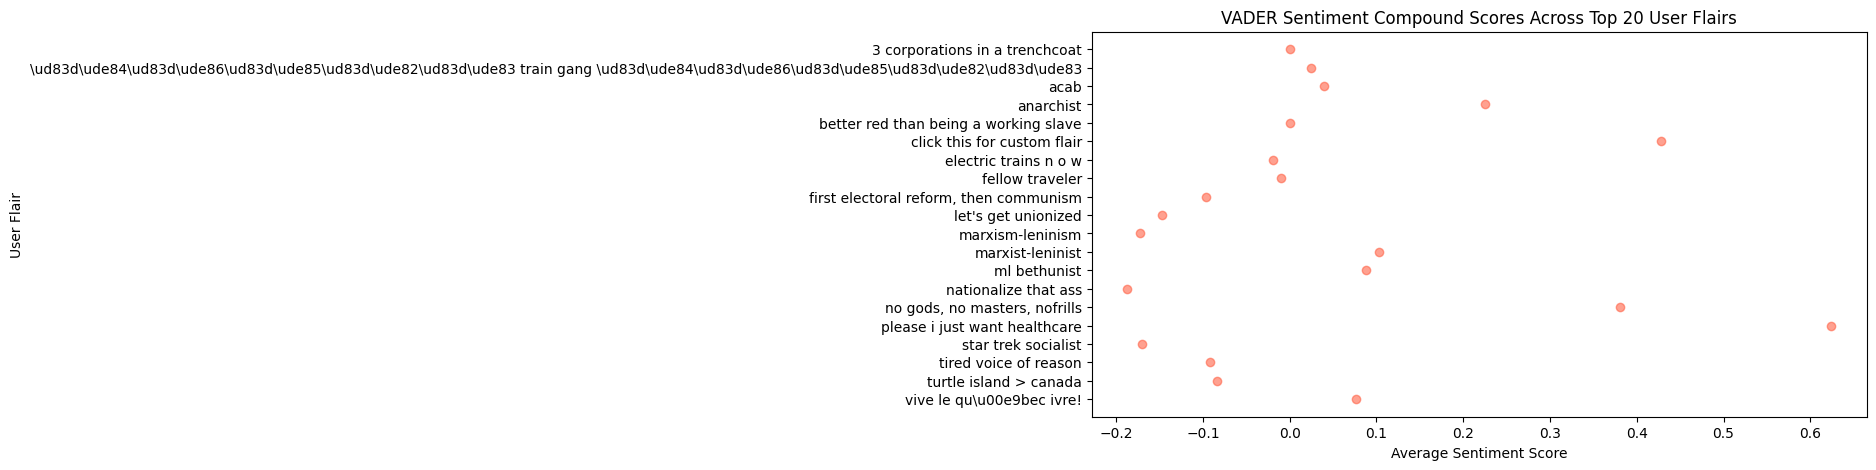

In [13]:
# Group by user flair and calculate mean sentiment
flair_sentiment = df_top_20_flairs.groupby("user_flair")["vader_sentiment_compound"].mean()

#Sort and prepare the data for plotting
flair_sentiment_sorted = flair_sentiment.sort_index(ascending=False)
flair_sentiment_sorted.index = pd.CategoricalIndex(flair_sentiment_sorted.index, ordered=True, categories=sorted(flair_sentiment_sorted.index))
flair_codes_sentiment = flair_sentiment_sorted.index.codes

plt.figure(figsize=(10, 5))
plt.scatter(flair_sentiment_sorted.values, flair_codes_sentiment, alpha=0.6, color='tomato')
plt.yticks(flair_codes_sentiment, flair_sentiment_sorted.index.categories)
plt.title("VADER Sentiment Compound Scores Across Top 20 User Flairs")
plt.ylabel("User Flair")
plt.xlabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

## Submission Flair Data


In [14]:
# Standardize filtering by converting 'user_flair' to lowercase and stripping spaces and quotes
df['submission_flair'] = df['submission_flair'].str.lower().str.strip("'\"")
df_filtered = df[(df["submission_flair"] != "none") & (df["user_flair"] != "")]

unique_sflairs = df_filtered["submission_flair"].unique()
if len(unique_sflairs) > 0:
    print("The unique Submission_Flair types are:")
    print("-" * 37)
    for flair in unique_sflairs:
        print(f"- {flair}")
else:
    print("There are no Submission Flairs in this dataset")

The unique Submission_Flair types are:
-------------------------------------
- international news \ud83d\udcf0
- international solidarity \u270a
- national news \ud83d\udcf0
- canadian content 
- labour news \u270a
- that's my oc baby! 
- discussion
- painfully canadian \ud83d\ude29
- meme
- sub announcement
- praries
- hellberta
- anti-fascism
- international
- green
- painfully canadian
- nan


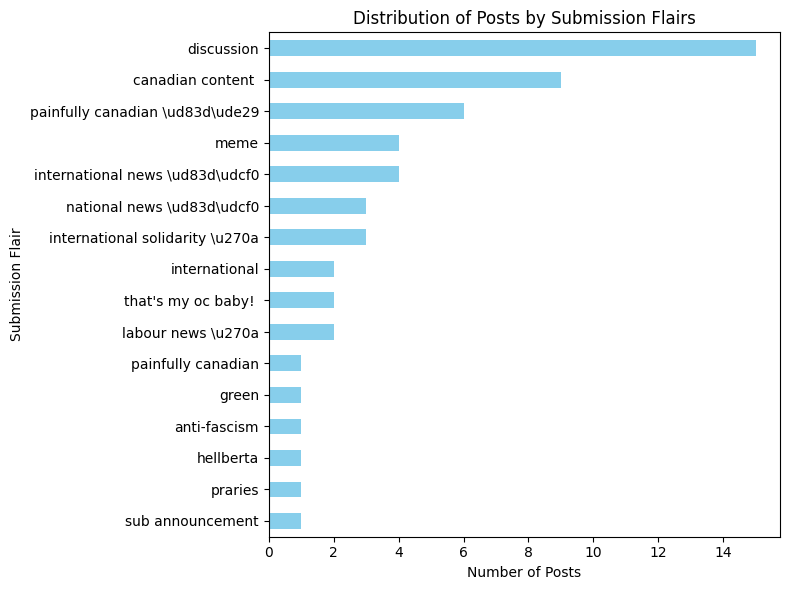

In [15]:
# Calculate the count of posts for each user flair to find the most active flairs
flair_activity = df_filtered['submission_flair'].value_counts()
plt.figure(figsize=(8, 6))
flair_activity.sort_values().plot(kind='barh', color='skyblue')
plt.title("Distribution of Posts by Submission Flairs")
plt.xlabel("Number of Posts")
plt.ylabel("Submission Flair")
plt.tight_layout()
plt.show()